<font size = "5"> **Chapter 2: [Introduction](CH1_00-Introduction.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />

# Homework 2

<font size = "5"> Reading Microscopy Data</font>

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM//main/Homework/Homework02.ipynb)

part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2022
<br>
Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes.


## Load Packages

First we need to load the libraries we want to use. 
Here we use:
- numpy: numerical library
- matplotlib: graphic library
- pyTEMlib: TEM microsocpy library

All of those packages except pyTEMlib are provided by annaconda.
### Check Installed Packages

In [1]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = get_distribution(package_name).version
    except (DistributionNotFound, ImportError):
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2022.2.1':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

done


### Load the plotting and pyTEMlib packages

In [2]:
%pylab  notebook
%gui qt
import pyTEMlib
import pyTEMlib.file_tools  as ft     # File input/ output library


# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)
__notebook__='CH1_04-Reading_File'
__notebook_version__='2021_12_14'

Populating the interactive namespace from numpy and matplotlib
Symmetry functions of spglib enabled
pyTEM version:  0.2022.2.1


## Open a file 

This function opens a hfd5 file in the pyNSID style which enables you to keep track of your data analysis.

Please see the **[Installation](CH1_02-Prerequisites.ipynb#TEM-Library)** notebook for installation.


Please note that the plotting routine of ``matplotlib`` was introduced in **[Matplotlib and Numpy for Micrographs](CH1_03-Data_Representation.ipynb)** notebook.

In the first lab we used a sample with a carbon grid of a periodicity of 500 nm

Download your images from the google drive at https://drive.google.com/drive/folders/1TId7PiGUbip8m8JgX2FL5PaNjld1idzt?usp=sharing

> You must log into Google with your UTK account to be able to read these data.
>

Go to the folder of you data and select one

Cannot overwrite file. Using:  Austin_31.5k-1.hf5


C:\Users\gduscher\Anaconda3\lib\site-packages\pyNSID\io\hdf_utils.py:350: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


<IPython.core.display.Javascript object>


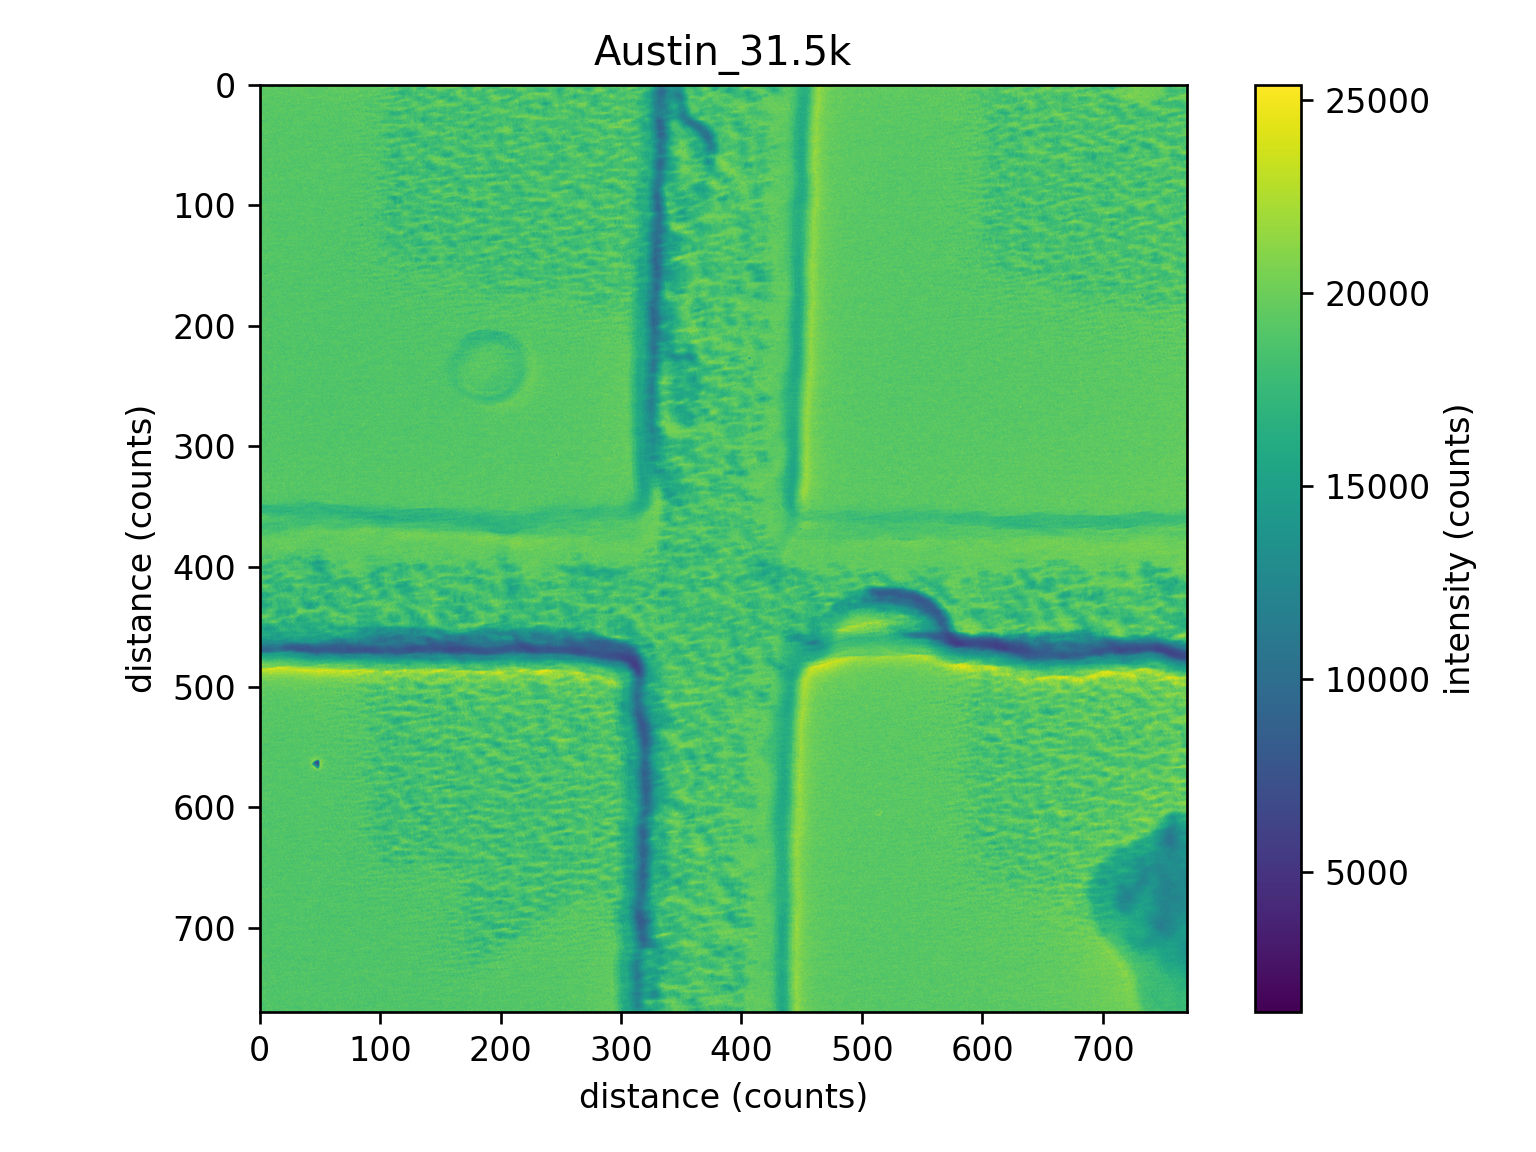

In [3]:
main_dataset = ft.open_file()

view = main_dataset.plot()

## Determination of Magnification  

We plot the image in pixels and there will be a line to select the length of a feature.

Any Mouseclick will extend the line from the last click

<IPython.core.display.Javascript object>


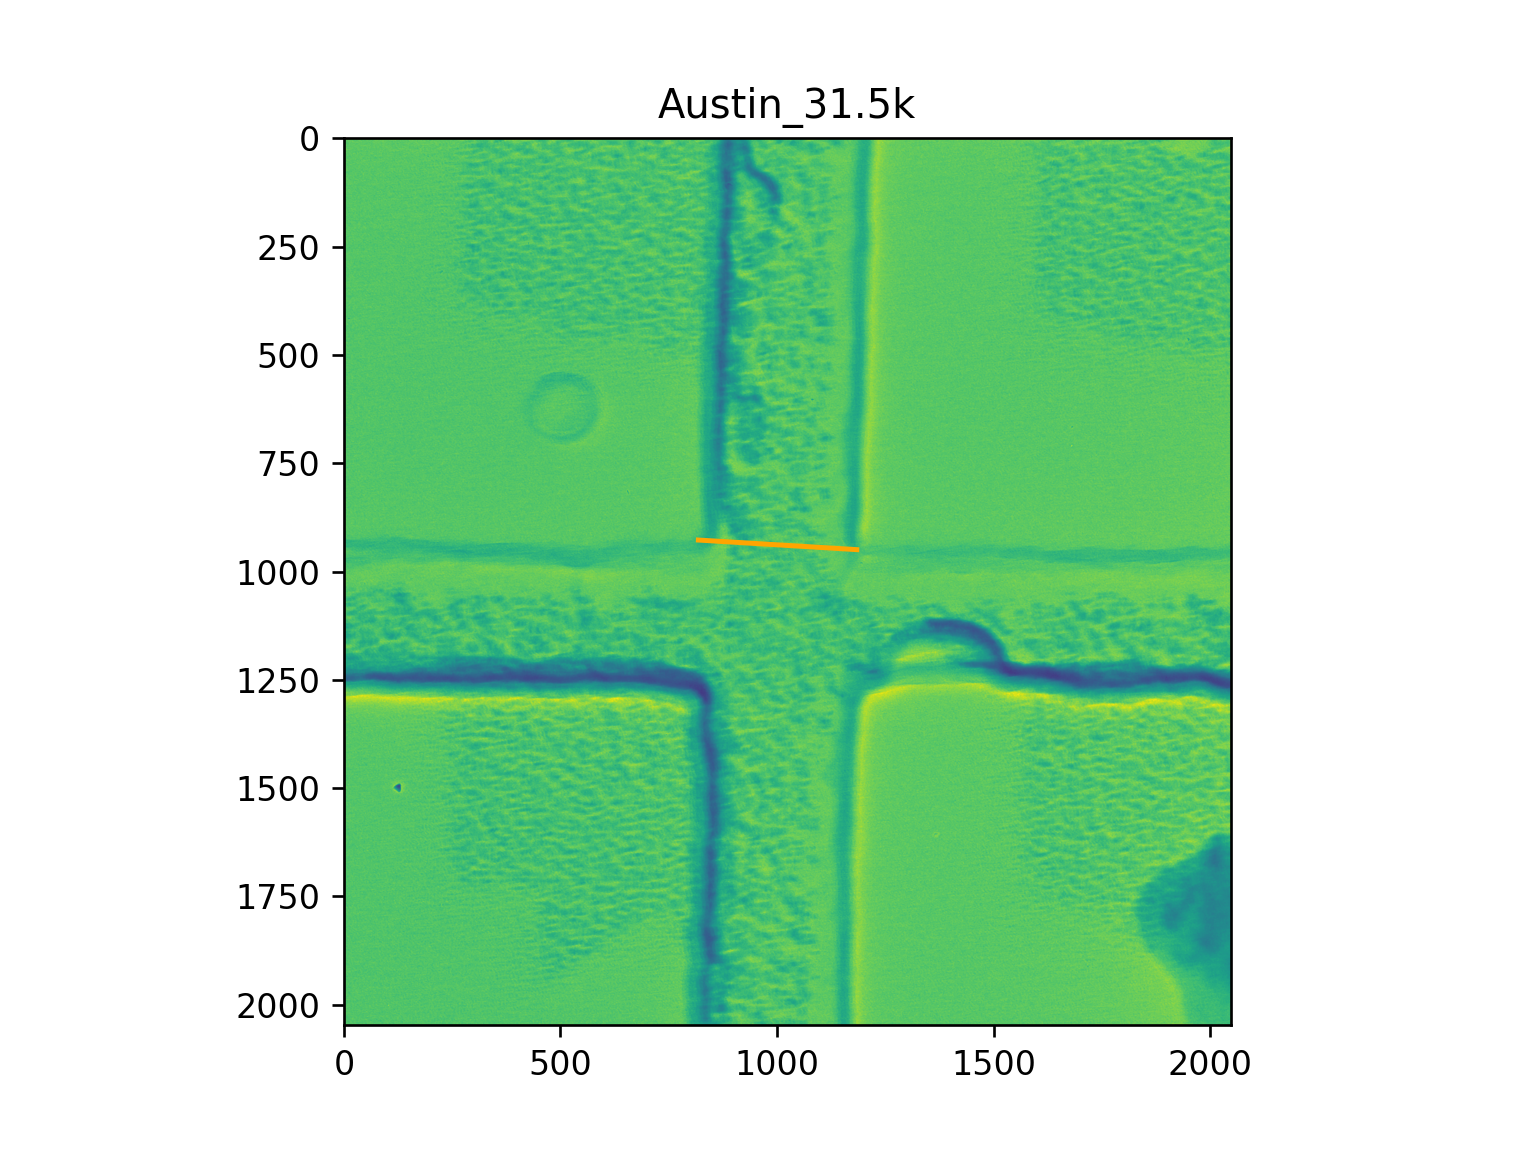

9

In [5]:
fig = plt.figure()

plt.imshow(main_dataset.T)
plt.title(main_dataset.title)
ax = plt.gca()
start_x = 0

fixed_line = False
line = plt.plot([0, 100],[0,200], color = 'orange')


def on_click(event):
   
    if event.inaxes:
        (start_x, end_x), (start_y, end_y) = line[0].get_data()
        start_x = end_x
        start_y = end_y
        end_x = event.xdata
        end_y = event.ydata

        line[0].set_data([start_x, end_x],[start_y, end_y])

        plt.draw()
# mouse_reference = plt.connect('motion_notify_event', on_move)
fig.canvas.mpl_connect('button_press_event', on_click)

## Length and Angle of Line 

In [6]:
line_coordinates = np.array(line[0].get_data()).T
vector = line_coordinates[0]-line_coordinates[1]
print(f' The line is {np.linalg.norm(vector):.2f}pixels long')
print(f' The angle is {np.degrees(np.arctan2(vector[1], vector[0]))%180:.2f} degrees')

 The line is 366.39pixels long
 The angle is 3.47 degrees


## Second Image

In [ ]:
main_dataset = ft.open_file()

view = main_dataset.plot()

## Determination of Magnification of Image 2

We plot the image in pixels and there will be a line to select the length of a feature.

Any Mouseclick will extend the line from the last click

In [ ]:
fig = plt.figure()

plt.imshow(main_dataset.T)
plt.title(main_dataset.title)
ax = plt.gca()
start_x = 0

fixed_line = False
line = plt.plot([0, 100],[0,200], color = 'orange')


def on_click(event):
   
    if event.inaxes:
        (start_x, end_x), (start_y, end_y) = line[0].get_data()
        start_x = end_x
        start_y = end_y
        end_x = event.xdata
        end_y = event.ydata

        line[0].set_data([start_x, end_x],[start_y, end_y])

        plt.draw()
# mouse_reference = plt.connect('motion_notify_event', on_move)
fig.canvas.mpl_connect('button_press_event', on_click)

## Length and Angle of Line of Image 2

In [ ]:
line_coordinates = np.array(line[0].get_data()).T
vector = line_coordinates[0]-line_coordinates[1]
print(f' The line is {np.linalg.norm(vector):.2f}pixels long')
print(f' The angle is {np.degrees(np.arctan2(vector[1], vector[0]))%180:.2f} degrees')

# Question

- What are the pixel sizes in the two images
- What is the relative change in magnification with respect to pixel and with respect to indicated Magnification

- What is the relative rotation